# Capstone Webscrapping using BeautifulSoup

I scrap a list of movies released from IMDB between 2019-01-01 and 2019-12-31



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests
import pandas as pd 

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, I use .content to see what we exactly get, in here I slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. I use Beautiful soup class which will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

In [5]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:6000])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
   </a>
  </div>
  <div class="lister-item-content">
   <h3 class="lister-item-header">
    <span class="lister-item-index unbold text-primary">
     1.
    </span>
    <a href="/title/tt8111088/">
     The Mandalorian
    </a>
    <span class="lister-item-year text-muted unbold">
     (2019– )
    </span>
   </h3>
   <p class="text-muted">
    <span class="runtime">
     40 min
    </span>
    <span cla

In [6]:
div = table.find_all('a')
div 
 # just call 2 founded a

[<a href="/title/tt8111088/"> <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a>,
 <a href="/title/tt8111088/">The Mandalorian</a>,
 <a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>1</span></a>,
 <a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>2</span></a>,
 <a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>3</span></a>,
 <a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>4</span></a>,
 <a href="/register/login?why=vote" rel="nofollow" title="Register or login to rate this title"><span>5</span></a>,
 <a href="/regis

In [7]:
movie_title = soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_title))
print(len(movie_title))

<class 'bs4.element.ResultSet'>
50


In [8]:
movie_rating = soup.find_all('div', class_ = 'inline-block ratings-imdb-rating')
print(type(movie_rating))
print(len(movie_rating))

<class 'bs4.element.ResultSet'>
50


In [9]:
movie_votes = soup.find_all('div', class_ = 'inline-block ratings-imdb-rating')
print(type(movie_votes))
print(len(movie_votes))

<class 'bs4.element.ResultSet'>
50


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

In [10]:
# Lists to store the scraped data in
names = []
imdb_ratings = []
votes = []
# Extract data from individual movie container
for container in movie_title:
# If the movie has Metascore, then extract:
#     container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
df = pd.DataFrame({'title' : names, 'imdb_ratings' : imdb_ratings , 'votes' : votes})
df.head()

,title,imdb_ratings,votes
0,The Mandalorian,8.8,300809
1,The Boys,8.7,254119
2,Avengers: Endgame,8.4,833178
3,For All Mankind,7.7,14563
4,Captain Marvel,6.9,455442


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='title'>

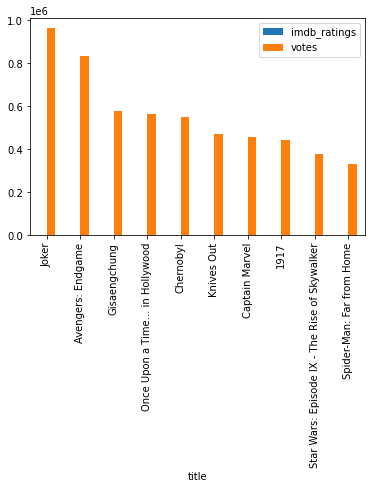

In [13]:
df.sort_values('votes', ascending=False).head(10).set_index('title').plot(kind='bar')

<AxesSubplot:xlabel='title'>

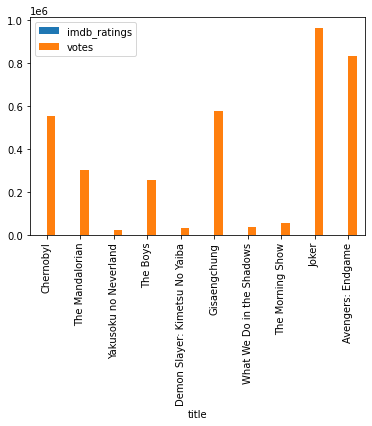

In [15]:
df.sort_values('imdb_ratings', ascending=False).head(10).set_index('title').plot(kind='bar')

Based on IMDB, Joker ranks first in number of votes followed closely by Avengers : Endgame. There are only 4 movies which have high rating and high number of votes, such as Joker, Avengers : Endgame, Gisaengchung (Parasite), and Chernobyl. In conlusion, a popular movie doesn't mean it will receive good ratings.